In [1]:
import scanpy as sc
import numpy as np
import matplotlib.pyplot as plt
import singleCellHaystack as hs
import timeit

sc.set_figure_params(facecolor="white", dpi=90)

# Load toy data

In [2]:
adata = sc.read_h5ad("datasets/toy.h5ad")
adata

AnnData object with n_obs × n_vars = 601 × 500
    obsm: 'X_tsne'

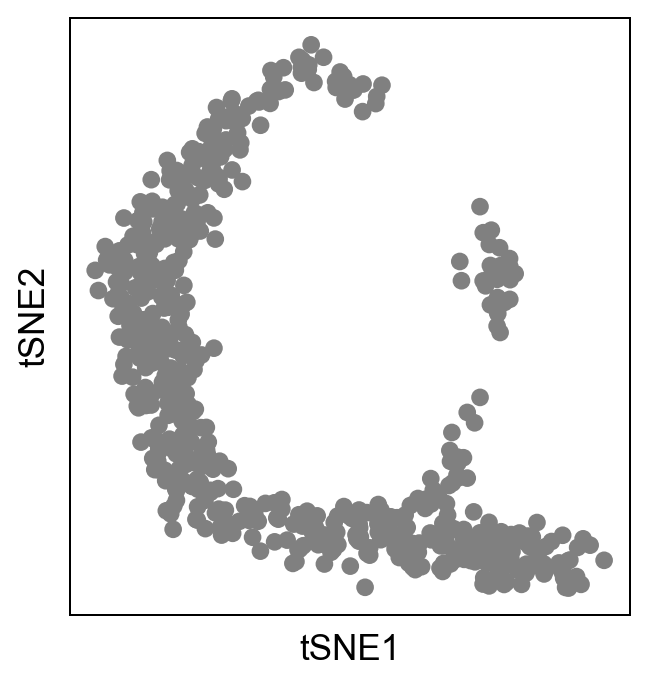

In [3]:
sc.pl.scatter(adata, basis="tsne")

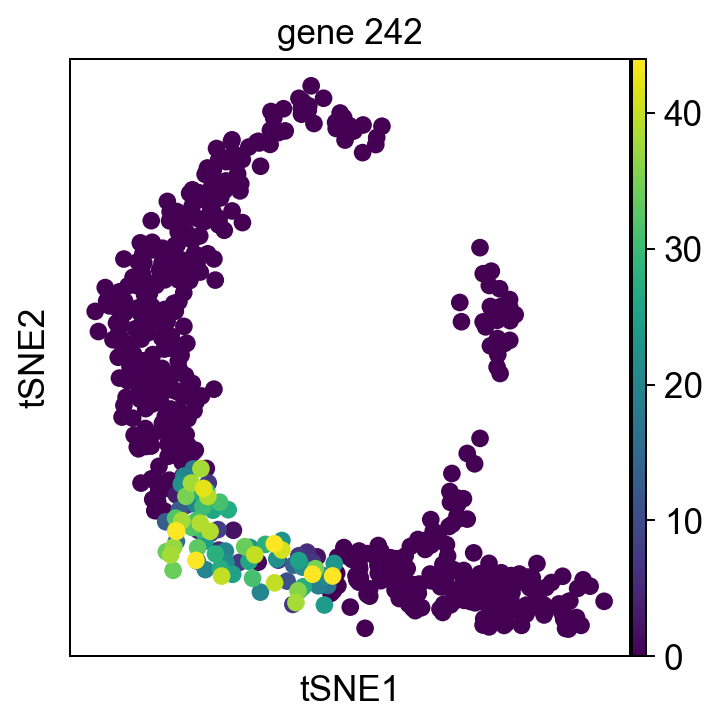

In [4]:
sc.pl.scatter(adata, basis="tsne", color="gene_242")

# Run haystack

In [5]:
#%%timeit -n 1 -r 1
np.random.seed(1)
res1 = hs.haystack(adata, basis="tsne", n_randomizations=100, n_genes_to_randomize=100, spline_method="ns")

> starting haystack ...
> scaling coordinates ...
> calculating feature's stds ...
> calculating grid points ...
> calculating distance to cells ...
> calculating densities ...
> calculating Q dist ...
> calculating KLD for 500 genes ...


100%|████████████████████████████████████████████████████████| 500/500 [00:00<00:00, 7652.61it/s]


> calculating feature's CV ...
> selecting genes to randomize ...
> calculating randomized KLD ...


100%|██████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 82.60it/s]


> calculating P values ...
> done.


In [6]:
sum1 = res1["results"]
sum1

,gene,KLD,pval,pval_adj,logpval,logpval_adj
241,gene_242,1.744636,1.054811e-37,5.274053e-35,-3.697683e+01,-34.277855
338,gene_339,1.840823,3.634084e-36,1.817042e-33,-3.543961e+01,-32.740635
274,gene_275,1.788655,1.349601e-35,6.748004e-33,-3.486979e+01,-32.170825
61,gene_62,2.092214,1.238503e-33,6.192517e-31,-3.290710e+01,-30.208133
350,gene_351,1.833618,2.207966e-33,1.103983e-30,-3.265601e+01,-29.957038
...,...,...,...,...,...,...
354,gene_355,0.473289,9.999989e-01,1.000000e+00,-4.898981e-07,0.000000
397,gene_398,0.442624,9.999991e-01,1.000000e+00,-3.963665e-07,0.000000
463,gene_464,0.372944,9.999993e-01,1.000000e+00,-3.035577e-07,0.000000
374,gene_375,0.464539,1.000000e+00,1.000000e+00,-3.960381e-09,0.000000


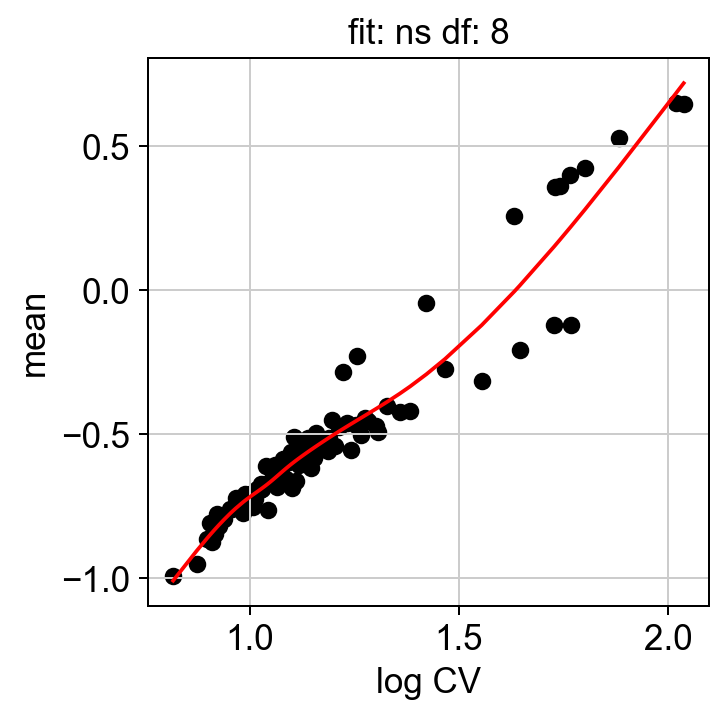

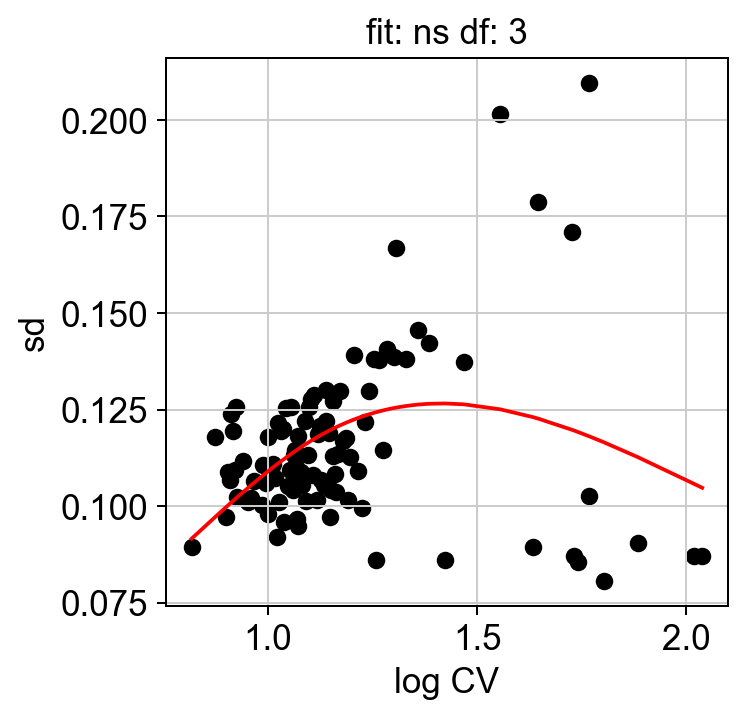

In [7]:
hs.plot_rand_fit(res1, "mean")
hs.plot_rand_fit(res1, "sd")

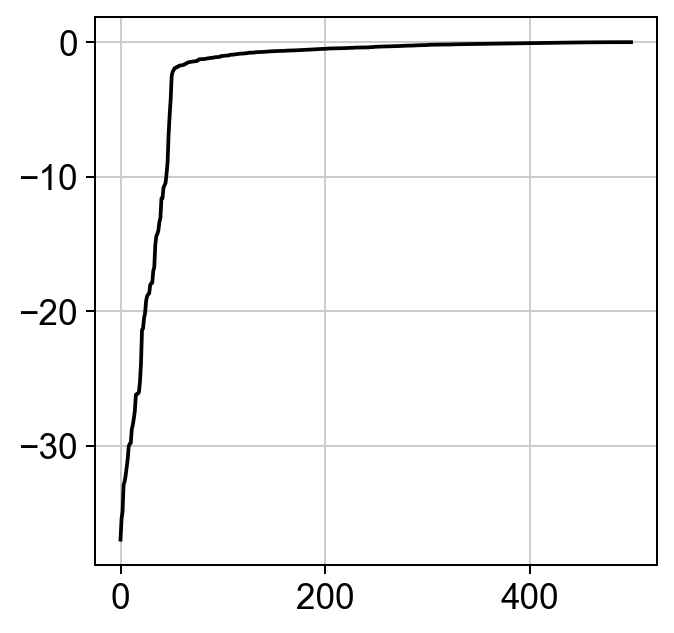

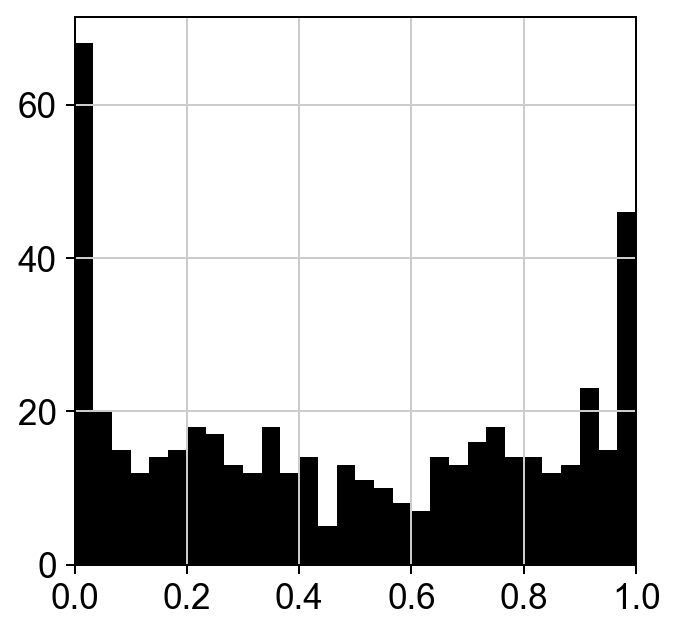

In [8]:
hs.plot_pval_rank(res1)
hs.plot_pval_hist(res1)

In [9]:
sum1.to_csv("test_toy-results.tsv")

In [10]:
res1["info"]["grid_points"].tofile("grid_points.txt")

In [11]:
import pandas as pd
gp = pd.DataFrame(res1["info"]["grid_points"], columns=["tSNE_1", "tSNE_2"])
gp

,tSNE_1,tSNE_2
0,1.160438,-1.217762
1,-1.157809,0.736357
2,-0.643734,-0.684866
3,0.568293,1.747613
4,-0.646647,1.447752
...,...,...
95,-0.476515,1.511170
96,0.150230,-0.907252
97,-0.424087,1.299143
98,-0.696888,-0.202509


In [12]:
gp.to_csv("test_toy-grid_coord.tsv", sep="\t")

In [13]:
np.random.seed(1)
res2 = hs.haystack(adata, basis="tsne", n_randomizations=100, n_genes_to_randomize=100, spline_method="ns")

> starting haystack ...
> scaling coordinates ...
> calculating feature's stds ...
> calculating grid points ...
> calculating distance to cells ...
> calculating densities ...
> calculating Q dist ...
> calculating KLD for 500 genes ...


100%|████████████████████████████████████████████████████████| 500/500 [00:00<00:00, 7044.63it/s]


> calculating feature's CV ...
> selecting genes to randomize ...
> calculating randomized KLD ...


100%|██████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 75.74it/s]


> calculating P values ...
> done.


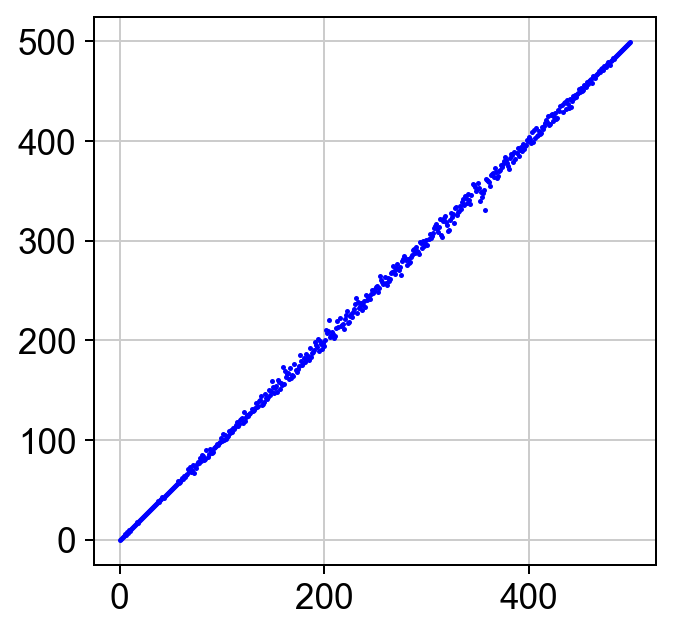

In [14]:
hs.plot_compare_ranks(res1, res2)

In [20]:
res1["info"]["genes_to_randomize"]

array([ 27, 474,  40, 359, 489, 261, 179, 303, 148, 325,  35, 436, 392,
       319, 140, 396, 445, 116, 364,  85, 264, 422, 167, 409, 386, 291,
       147,  42,  84, 220, 477, 286, 371, 169,   5, 476, 171, 363, 429,
       110, 115, 280, 275, 223,  18, 404, 142, 285, 125, 253, 281, 296,
       221, 206,   0, 410,  45, 302, 239, 201,  43, 226,  10, 138, 194,
       146, 205,  34, 276, 472, 309, 262,   4, 478, 401, 304, 160, 339,
       232, 117,  87, 419, 184, 385, 326, 354,   9, 389, 283, 215, 362,
       379, 224, 448, 175, 347, 487,   8, 233, 228])

In [25]:
sum1.gene[res1["info"]["genes_to_randomize"]].sort_values()

0        gene_1
9       gene_10
10      gene_11
110    gene_111
115    gene_116
         ...   
5        gene_6
84      gene_85
85      gene_86
87      gene_88
8        gene_9
Name: gene, Length: 100, dtype: object

In [27]:
res1["info"]["exprs_cv"]

array([3.1088996, 2.6344223, 2.8127062, 3.2188928, 3.3693497, 2.8994672,
       2.954853 , 3.0615008, 6.574728 , 4.1488566, 3.1775591, 2.627255 ,
       4.2110534, 3.2631614, 2.9534392, 3.370038 , 3.8371072, 2.67689  ,
       2.9894476, 2.8451216, 2.8884983, 3.0595253, 2.8865907, 3.6437721,
       4.0644693, 2.846838 , 2.8051512, 2.2646315, 3.1918948, 2.937855 ,
       2.981828 , 3.0951529, 3.05751  , 2.6902335, 3.25458  , 2.5585759,
       2.9020226, 2.8188014, 3.1804755, 3.1610665, 2.4577332, 3.199303 ,
       2.825741 , 3.1587036, 3.8001258, 3.1252997, 2.9033418, 3.681622 ,
       3.15654  , 3.9423096, 4.010753 , 2.9467087, 2.894432 , 3.14596  ,
       2.8014057, 2.9119294, 3.7546334, 3.1400697, 3.4083734, 3.7005823,
       3.0182269, 2.9311554, 3.286007 , 3.5736713, 3.0461783, 4.22836  ,
       2.9086611, 2.9129236, 3.3321517, 3.1493306, 3.4236286, 2.7052383,
       3.0858934, 3.2009122, 3.291839 , 2.8336046, 3.2792673, 4.4266653,
       3.1743474, 3.689554 , 2.8911896, 3.2121527, 

In [30]:
pd.DataFrame({"gene": res1["info"]["genes_to_randomize"]}).to_csv("test_toy-genes_to_rand.tsv")